# Lending Club Loan Project
### Danny Mathieson - March 2022

### Downloading and Displaying the Dataset

In [47]:
import numpy as np
import pandas as pd

In [48]:
df = pd.read_csv('datasets/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [49]:
df.shape

(9578, 14)

In [50]:
# check for nulls
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### 1. Feature Transformation - Transform Categorical Values into Numerical Values

In [51]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [52]:
# Only purpose needs to be changed to numerical values - get dummies
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [53]:
df_dummy.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

### 2. EDA on Different Factors of the Dataset

In [54]:
# Describe the data, split columns into either binary or numerical sub-types
df_dummy.describe()
numerical_cols = ['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths', 'delinq.2yrs', 'pub.rec']
binary_cols = ['credit.policy','purpose_credit_card', 'purpose_debt_consolidation','purpose_educational','purpose_home_improvement','purpose_major_purchase','purpose_small_business']

In [55]:
from matplotlib import pyplot as plt
import seaborn as sns

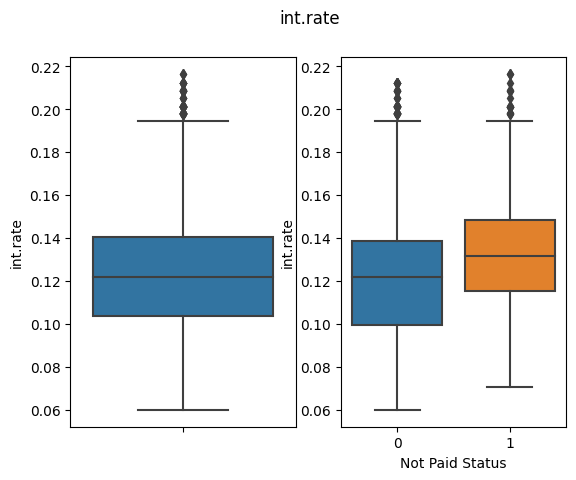

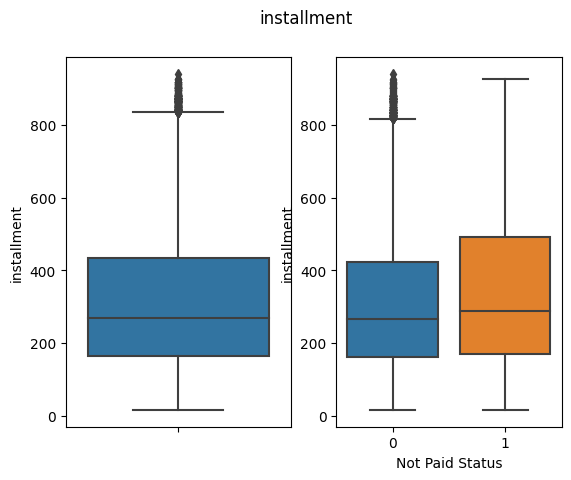

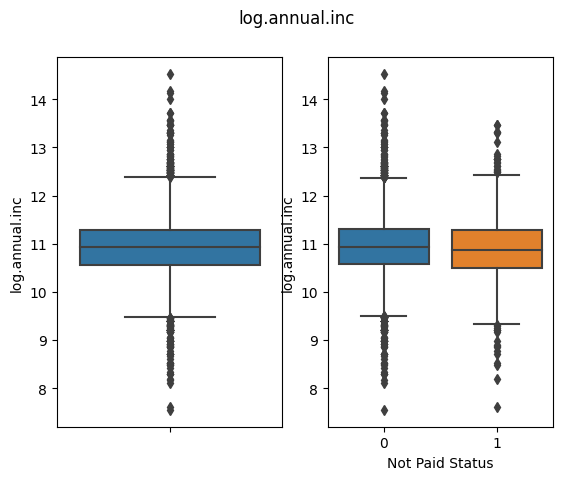

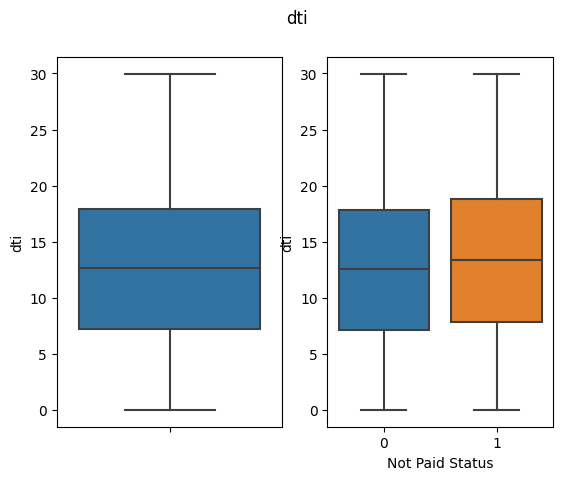

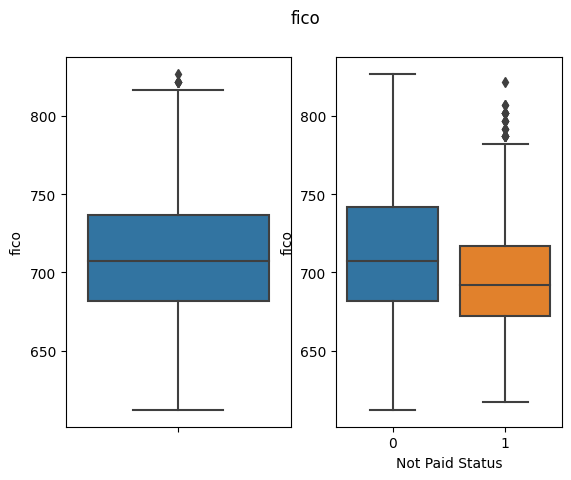

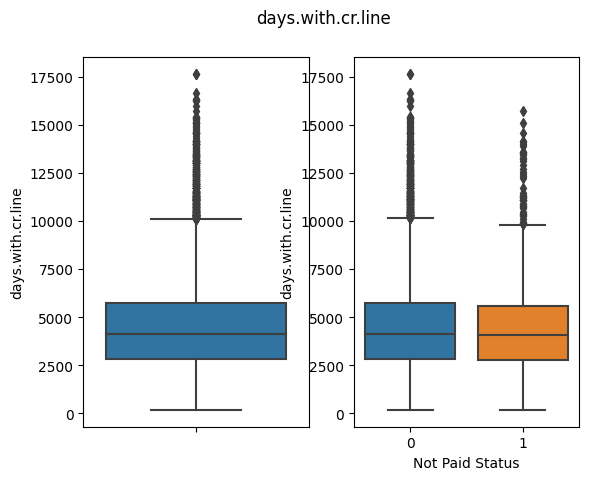

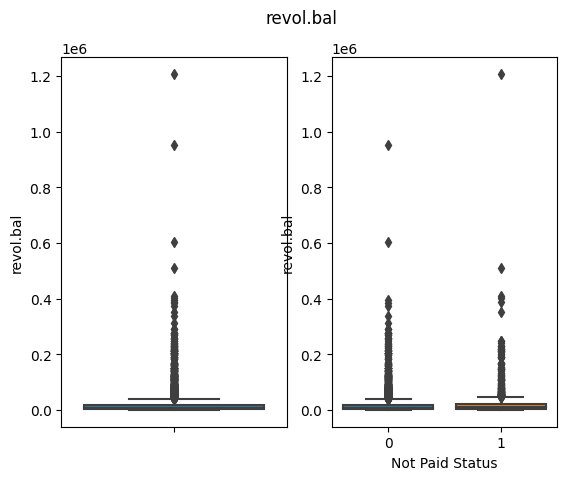

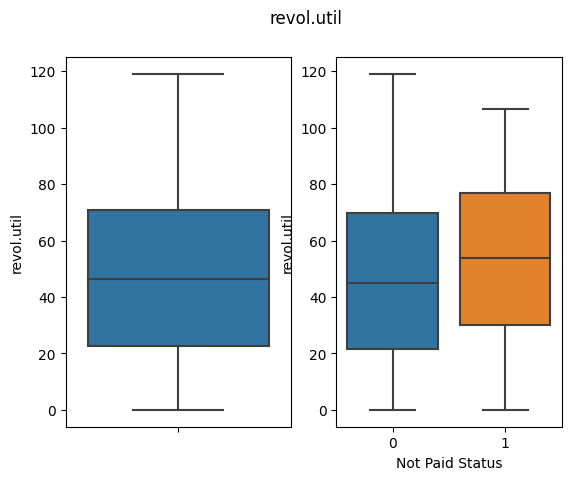

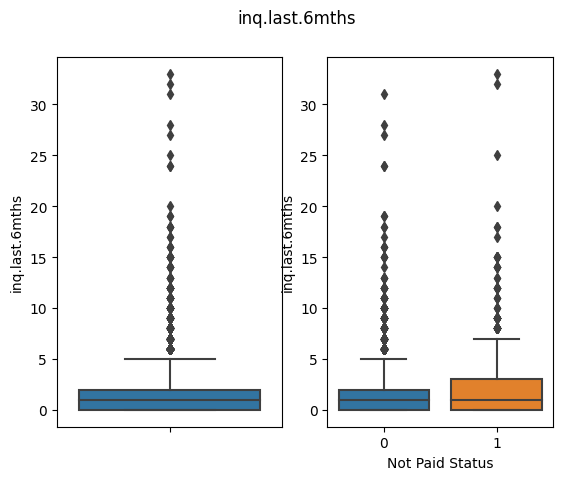

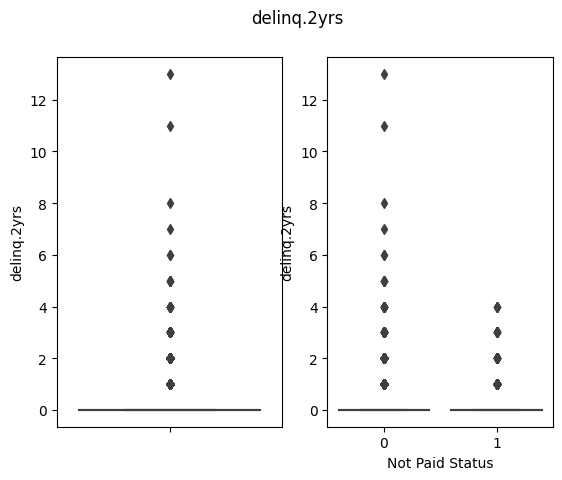

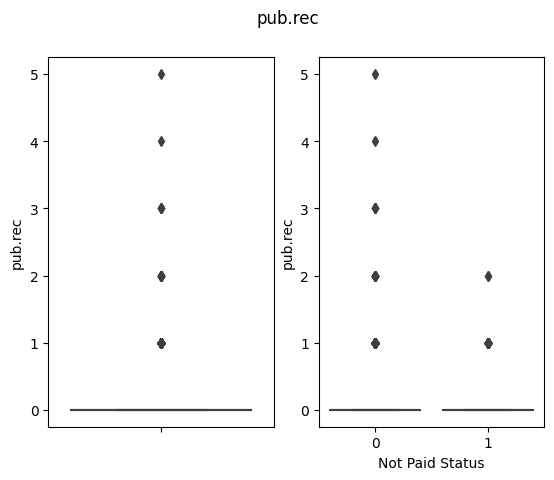

In [56]:
# Loop over numerical columns - Box Plot overall and by fully paid status
for c in numerical_cols:
    # get datasets by category
    total_data = df_dummy[[c]]
    cat_data = df_dummy[[c, 'not.fully.paid']]
    # create boxplots
    sns.boxplot(x=None, y=c, data=total_data, ax=plt.subplot(1,2,1))
    sns.boxplot(x='not.fully.paid', y=c, data=cat_data, ax=plt.subplot(1,2,2))
    # format chart and show
    plt.suptitle(c)
    plt.xlabel('Not Paid Status')
    plt.show()

##### - int.rate
    - Generally int.rate seems to correspond with a higher liklihood of not paying as the 25%, Median, and 75% are all higher than the paid class by a full percent or two
    - The upper extreme doesn't seem to impact the outcome much as the max percent excluding outliers is the same and they seem to have even numbers of outliers on the high end
    - interesting how no one with a sub 7% rate defaulted  
##### - installment
    - Once we start to get above 3.5 years the liklihood of default seems to go up, especially above 5 years  
##### - log.annual.inc - nothing  
##### - dti - nothing  
##### - fico
    - On first glance, lower fico scores definitely seem to have an impact on payback liklihood, but the entire range of paid back loans' fico scores contains the range of not paid back loans, including outliers.  
##### - days.with.cr.line - nothing  
##### - revol.bal - scale is too messed up to see much  
##### - revol.util
    - higher utilization rates has a slight impact on not paying back fully  
##### - inq.last.6mths
    - slightly impactful if above 2  
##### - delinq.2yrs 
    - not enough non-zero data
    - more outliers that have paid pack than haven't  
#####  pub.rec 
    - not enough non-zero data
    - more outliers that have paid pack than haven't  

/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_50789/3147033967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['Paid Status'] = np.where(df_dummy['not.fully.paid'] == 0, 'No', 'Yes')
/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_50789/3147033967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['Condition'] = np.where(df_dummy[c] == 0, 'No', 'Yes')


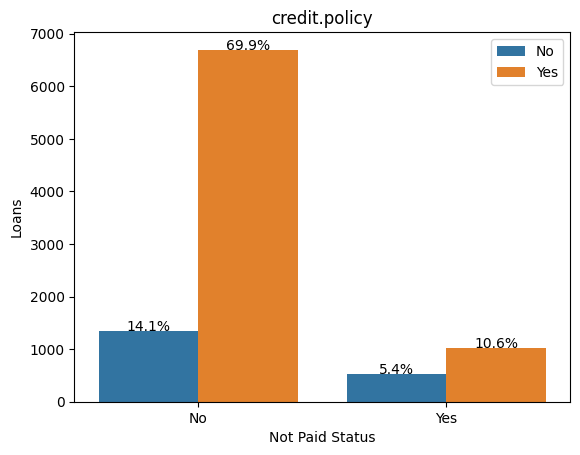

/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_50789/3147033967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['Paid Status'] = np.where(df_dummy['not.fully.paid'] == 0, 'No', 'Yes')
/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_50789/3147033967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['Condition'] = np.where(df_dummy[c] == 0, 'No', 'Yes')


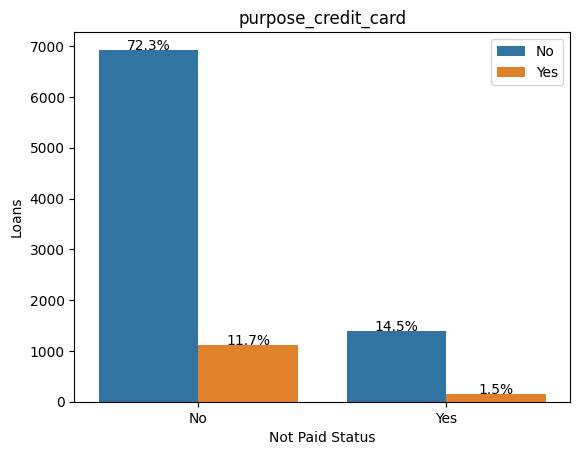

/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_50789/3147033967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['Paid Status'] = np.where(df_dummy['not.fully.paid'] == 0, 'No', 'Yes')
/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_50789/3147033967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['Condition'] = np.where(df_dummy[c] == 0, 'No', 'Yes')


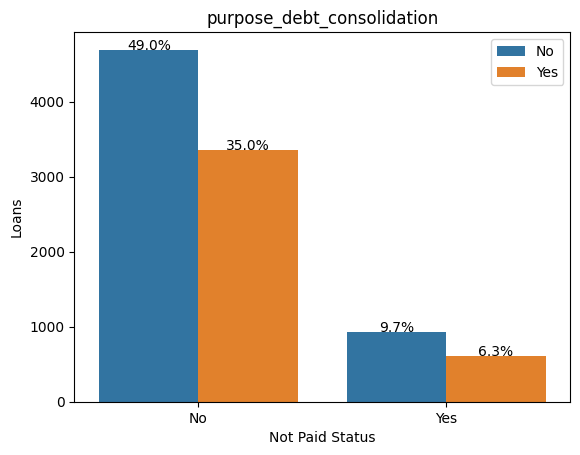

/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_50789/3147033967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['Paid Status'] = np.where(df_dummy['not.fully.paid'] == 0, 'No', 'Yes')
/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_50789/3147033967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['Condition'] = np.where(df_dummy[c] == 0, 'No', 'Yes')


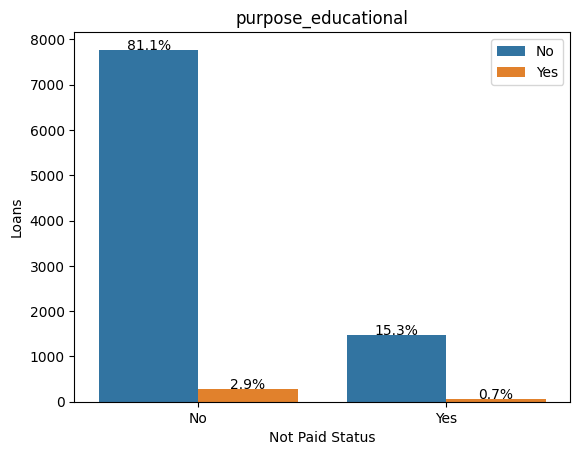

/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_50789/3147033967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['Paid Status'] = np.where(df_dummy['not.fully.paid'] == 0, 'No', 'Yes')
/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_50789/3147033967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['Condition'] = np.where(df_dummy[c] == 0, 'No', 'Yes')


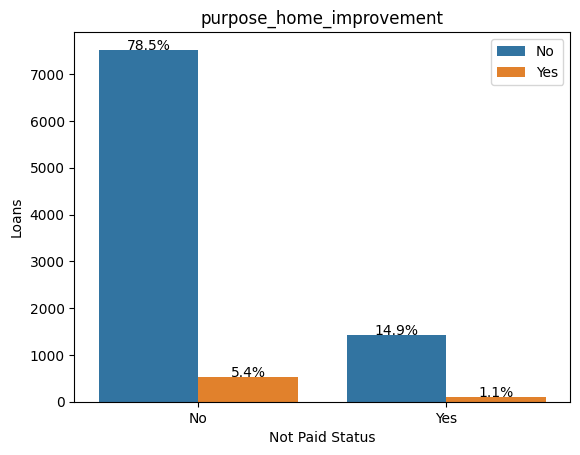

/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_50789/3147033967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['Paid Status'] = np.where(df_dummy['not.fully.paid'] == 0, 'No', 'Yes')
/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_50789/3147033967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['Condition'] = np.where(df_dummy[c] == 0, 'No', 'Yes')


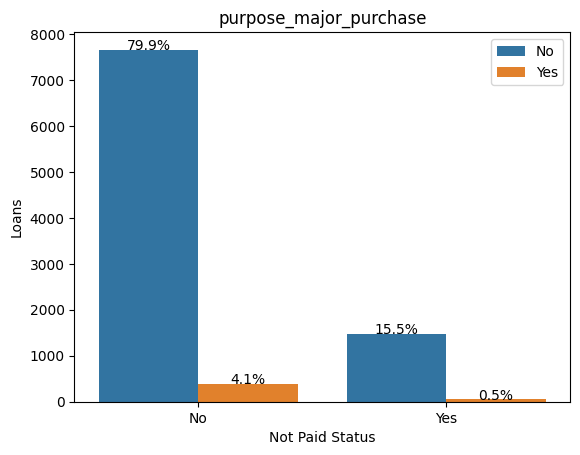

/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_50789/3147033967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['Paid Status'] = np.where(df_dummy['not.fully.paid'] == 0, 'No', 'Yes')
/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_50789/3147033967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['Condition'] = np.where(df_dummy[c] == 0, 'No', 'Yes')


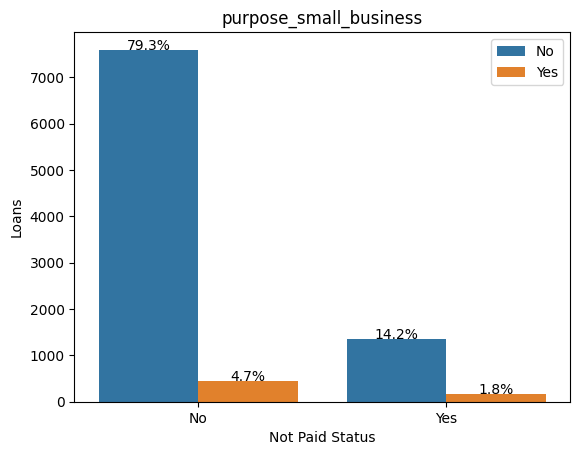

In [57]:
# Loop over Binary Columns & create a bar plot & stacked bar plot 
for c in binary_cols:
    bin_data = df_dummy[[c, 'not.fully.paid']]
    bin_data['Paid Status'] = np.where(df_dummy['not.fully.paid'] == 0, 'No', 'Yes')
    bin_data['Condition'] = np.where(df_dummy[c] == 0, 'No', 'Yes')
    # calculate percentages
    percent = bin_data.groupby(['Condition', 'Paid Status']).size().reset_index(name='count')
    percent['pct'] = percent['count'] / percent['count'].sum() * 100
    # create the plot
    order = {
        'Paid Status': ['No','Yes'],
        'Condition': ['No','Yes']
    }
    axis = sns.countplot(x='Paid Status', hue='Condition', data=bin_data, order=order['Paid Status'], hue_order=order['Condition'])
    # add percentages for tooltips
    counter=0
    for p in axis.patches:
        h = p.get_height()
        pct = f"{round(percent['pct'][counter],1)}%"
        x_ax_pos = p.get_x() + p.get_width() / 2.0
        counter += 1
        axis.text(
            x_ax_pos,
            h + 3,
            pct,
            ha='center'
        )
    plt.title(c)
    plt.xlabel('Not Paid Status')
    plt.ylabel('Loans')
    plt.legend()
    plt.show()
    

##### - credit.policy
    - About 4/5 of all peope are approved for credit
    - About 2/3 of the unpaid loans are from people that fit the credit policy criteria
    - In general unapproved people are more likely to default. 25% of unapproved loans defaulted compared to just 13% of approved loans
##### - purpose_credit_card
    - 13.2% of loans are credit card loans
    - 11.4% of credit card loans default
##### - purpose_debt_consolidation 
    - 41.3% of loans are debt consolidation
    - 15.2% of debt consolidation loans default
##### - purpose_educational 
    - Only 3.6% of loans are educational
    - 19.4% of educational loans default
##### - purpose_home_improvement
    - 6.5% of loans are home improvement
    - 16.9% of home improvement loans default
##### - purpose_major_purchase
    - 4.6% of loans are for a major purchase
    - 10.9% of major purchase loans default
##### - purpose_small_business
    - 6.5% of loans are for a small business
    - 27.7% of small business loans default
    
#### - Key Takeaways
    - Small Business loans are by far the riskiest, followed by educational
    - Debt Consolidation is 41.3% of all loans, and they default at a slightly lower rate than average (16% default) 
    - Educational makes up such a small percentage, that small business is likely not super impactful
    - The only other loan type that is above average is Home Improvement

### 3. Additional Feature Engineering

In [58]:
# Find correlations between numerical features
features = df_dummy.drop(columns=['not.fully.paid'], axis=1)
num_features = features[numerical_cols]
labels = df_dummy[['not.fully.paid']]

<AxesSubplot: >

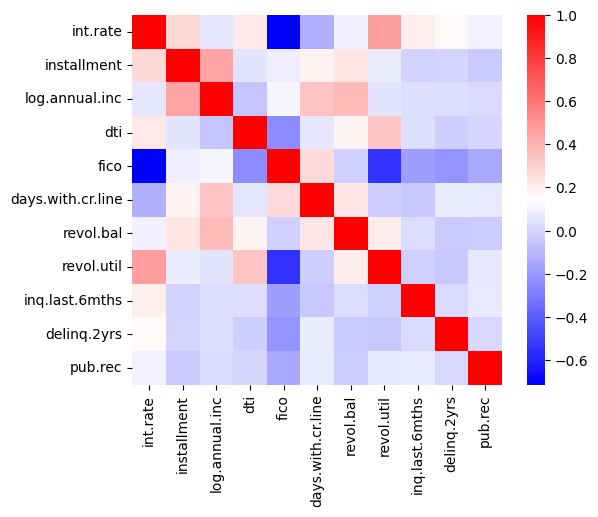

In [59]:
num_corr = num_features.corr()
sns.heatmap(data=num_corr, square=True, cmap='bwr')

In [60]:
corr_arr = num_corr.unstack()
corr_arr = corr_arr[corr_arr != 1]
corr_arr = corr_arr.drop_duplicates()
sorted_corr = corr_arr.sort_values(ascending=False)
opp_sorted_corr = corr_arr.sort_values(ascending=True)
print(f'Top Positive Correlations:\n\n{sorted_corr.head(10)}')
print(f'\n\nTop Negative Correlations:\n\n{opp_sorted_corr.head(10)}')

Top Positive Correlations:

int.rate           revol.util           0.464837
installment        log.annual.inc       0.448102
log.annual.inc     revol.bal            0.372140
dti                revol.util           0.337109
log.annual.inc     days.with.cr.line    0.336896
int.rate           installment          0.276140
fico               days.with.cr.line    0.263880
installment        revol.bal            0.233625
days.with.cr.line  revol.bal            0.229344
int.rate           dti                  0.220006
dtype: float64


Top Negative Correlations:

int.rate           fico                -0.714821
fico               revol.util          -0.541289
dti                fico                -0.241191
fico               delinq.2yrs         -0.216340
                   inq.last.6mths      -0.185293
                   pub.rec             -0.147592
int.rate           days.with.cr.line   -0.124022
log.annual.inc     dti                 -0.054065
revol.util         delinq.2yrs         -0.042

#### Correlation takeaways:
- The positive correlations are all below 0.5. I think we shouldn't remove any features due to those correlations
- FICO score is negatively correlated with quite a few features and should be removed because of it
- I may come back to check on int.rate & revol.util after building the model

In [61]:
features = features.drop(columns=['fico'], axis=1)

### 4. Modeling

In [62]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error
import joblib

def data_split_standardise(x,y=None):
    if y is None:
        st=StandardScaler()
        st.fit(x)
        x_std=st.transform(x)
        joblib.dump(st,"model_objects/StandardScalar_trained.h5")
        return(x_std)
    else:
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
        st=StandardScaler()
        st.fit(x_train)
        x_train_std=st.transform(x_train)
        x_test_std=st.transform(x_test)
        joblib.dump(st,"model_objects/StandardScalar_trained.h5")    
        return(x_train_std,x_test_std,y_train,y_test)

In [63]:
x_train, x_test, y_train, y_test = data_split_standardise(features,labels)

In [64]:
# Build Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from livelossplot import PlotLossesKerasTF

In [65]:
model = Sequential()
model.add(Input(shape=(None,x_train.shape[1]),name='Input_Layer'))
model.add(Dense(12,activation='relu',name='Hidden_Layer_1'))
model.add(Dense(8,activation='relu',name='Hidden_Layer_2'))
model.add(Dense(1,activation='sigmoid',name='Output_Layer'))

In [66]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy',Precision(),Recall()]
)

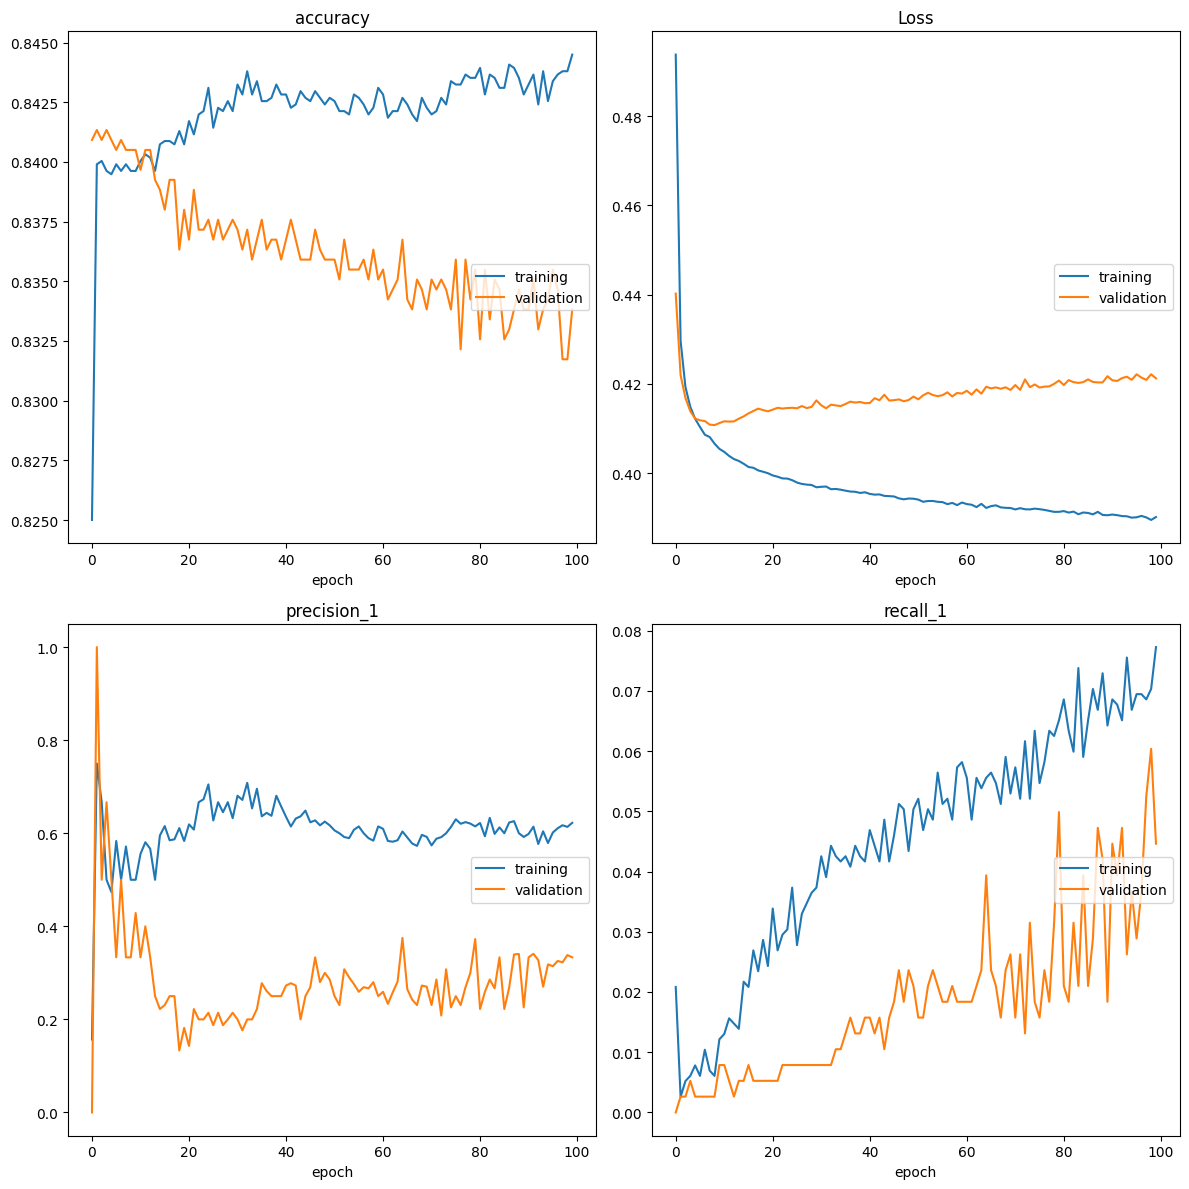

accuracy
	training         	 (min:    0.825, max:    0.844, cur:    0.844)
	validation       	 (min:    0.832, max:    0.841, cur:    0.834)
Loss
	training         	 (min:    0.390, max:    0.494, cur:    0.390)
	validation       	 (min:    0.411, max:    0.440, cur:    0.421)
precision_1
	training         	 (min:    0.157, max:    0.750, cur:    0.622)
	validation       	 (min:    0.000, max:    1.000, cur:    0.333)
recall_1
	training         	 (min:    0.003, max:    0.077, cur:    0.077)
	validation       	 (min:    0.000, max:    0.060, cur:    0.045)
225/225 [==============================] - 1s 5ms/step - loss: 0.3902 - accuracy: 0.8445 - precision_1: 0.6224 - recall_1: 0.0773 - val_loss: 0.4213 - val_accuracy: 0.8338 - val_precision_1: 0.3333 - val_recall_1: 0.0446


In [67]:
model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    callbacks=[PlotLossesKerasTF()]
)

This model is pretty overfit - try with a heavy weight on '1' class

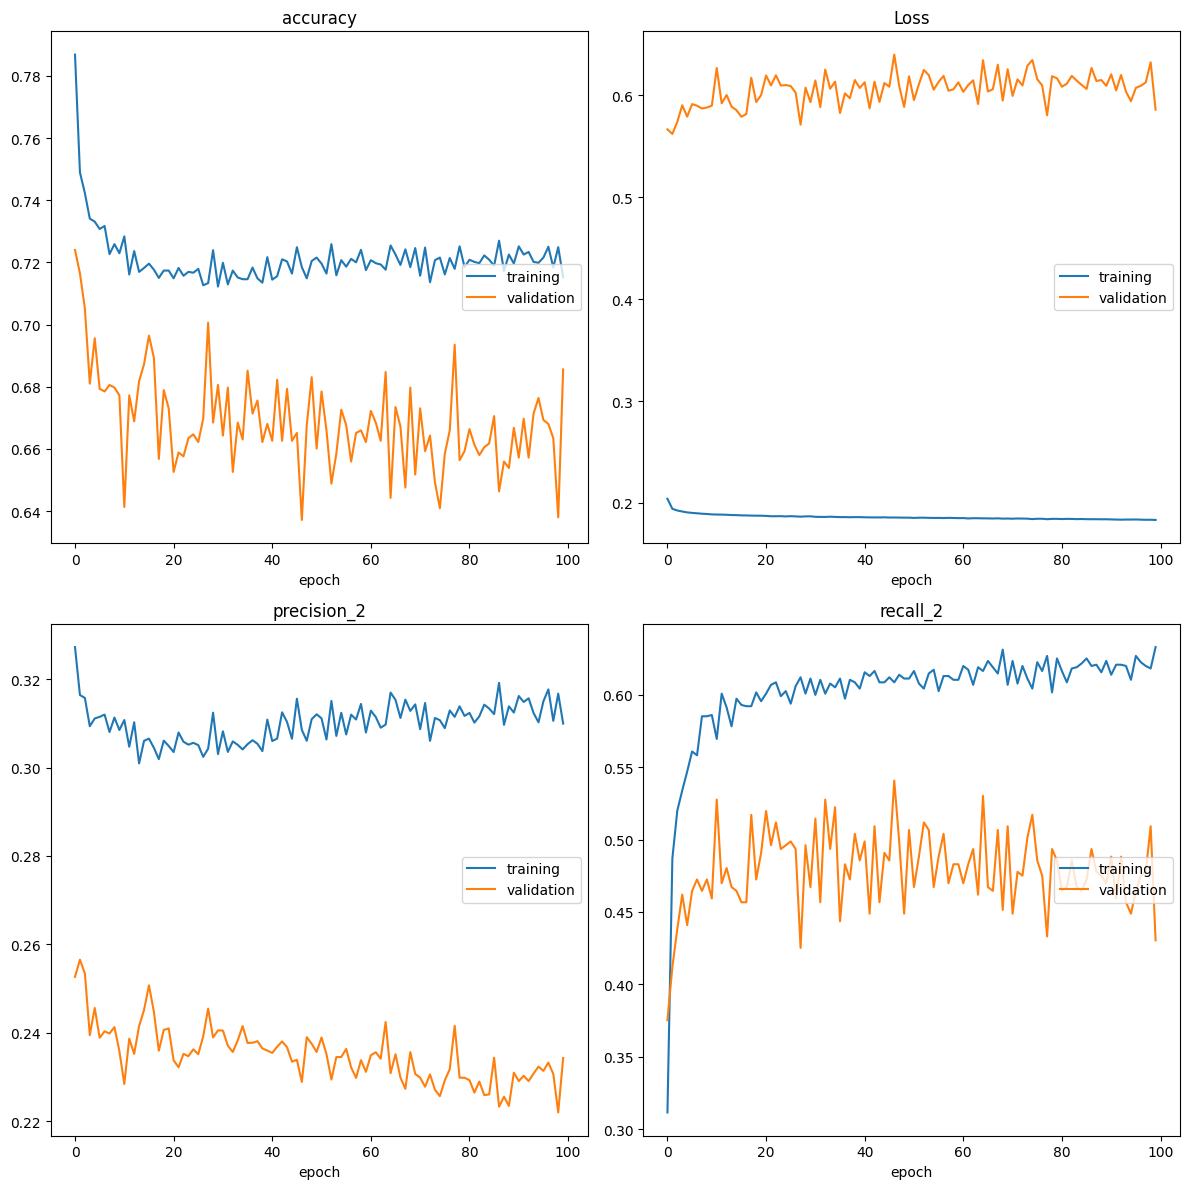

accuracy
	training         	 (min:    0.712, max:    0.787, cur:    0.715)
	validation       	 (min:    0.637, max:    0.724, cur:    0.686)
Loss
	training         	 (min:    0.183, max:    0.204, cur:    0.183)
	validation       	 (min:    0.562, max:    0.640, cur:    0.586)
precision_2
	training         	 (min:    0.301, max:    0.327, cur:    0.310)
	validation       	 (min:    0.222, max:    0.257, cur:    0.234)
recall_2
	training         	 (min:    0.312, max:    0.633, cur:    0.633)
	validation       	 (min:    0.375, max:    0.541, cur:    0.430)
225/225 [==============================] - 2s 7ms/step - loss: 0.1833 - accuracy: 0.7152 - precision_2: 0.3099 - recall_2: 0.6328 - val_loss: 0.5860 - val_accuracy: 0.6856 - val_precision_2: 0.2343 - val_recall_2: 0.4304


In [68]:
# Adding class weight
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy',Precision(),Recall()]
)

model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    callbacks=[PlotLossesKerasTF()],
    class_weight={1: 0.9, 0: 0.2}
)

Still Extremely Overfit - Try L2 Regularization

In [69]:
from tensorflow.keras.regularizers import L2

In [70]:
model = Sequential()
model.add(Input(shape=(None,x_train.shape[1]),name='Input_Layer'))
model.add(Dense(12,activation='relu',name='Hidden_Layer_1',kernel_regularizer=L2(l2=0.01)))
model.add(Dense(8,activation='relu',name='Hidden_Layer_2',kernel_regularizer=L2(l2=0.01)))
model.add(Dense(1,activation='sigmoid',name='Output_Layer'))

In [71]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy',Precision(),Recall()]
)

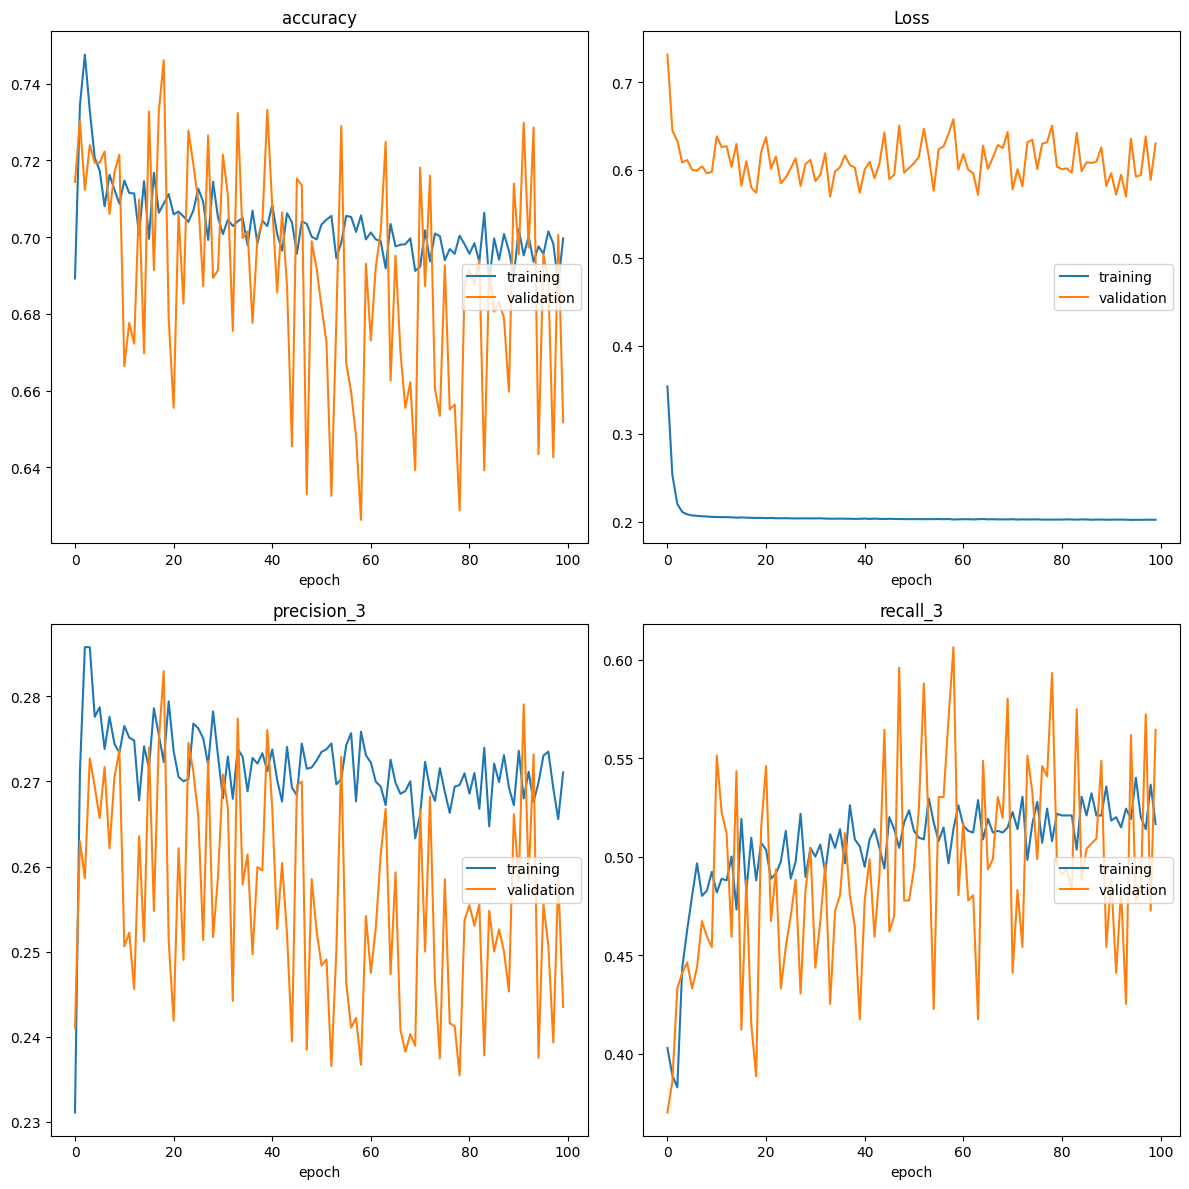

accuracy
	training         	 (min:    0.688, max:    0.748, cur:    0.700)
	validation       	 (min:    0.626, max:    0.746, cur:    0.652)
Loss
	training         	 (min:    0.202, max:    0.354, cur:    0.202)
	validation       	 (min:    0.570, max:    0.731, cur:    0.630)
precision_3
	training         	 (min:    0.231, max:    0.286, cur:    0.271)
	validation       	 (min:    0.235, max:    0.283, cur:    0.243)
recall_3
	training         	 (min:    0.383, max:    0.540, cur:    0.516)
	validation       	 (min:    0.370, max:    0.606, cur:    0.564)
225/225 [==============================] - 1s 5ms/step - loss: 0.2024 - accuracy: 0.6997 - precision_3: 0.2711 - recall_3: 0.5165 - val_loss: 0.6302 - val_accuracy: 0.6518 - val_precision_3: 0.2435 - val_recall_3: 0.5643


In [72]:
model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    callbacks=[PlotLossesKerasTF()],
    class_weight={1: 0.9, 0: 0.2}
)

In [73]:
# Adding some Dropout Layers
model = Sequential()
model.add(Input(shape=(None,x_train.shape[1]),name='Input_Layer'))
model.add(Dense(12,activation='relu',name='Hidden_Layer_1',kernel_regularizer=L2(l2=0.01)))
model.add(Dropout(0.30))
model.add(Dense(8,activation='relu',name='Hidden_Layer_2',kernel_regularizer=L2(l2=0.01)))
model.add(Dropout(0.30))
model.add(Dense(1,activation='sigmoid',name='Output_Layer'))

In [74]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy',Precision(),Recall()]
)

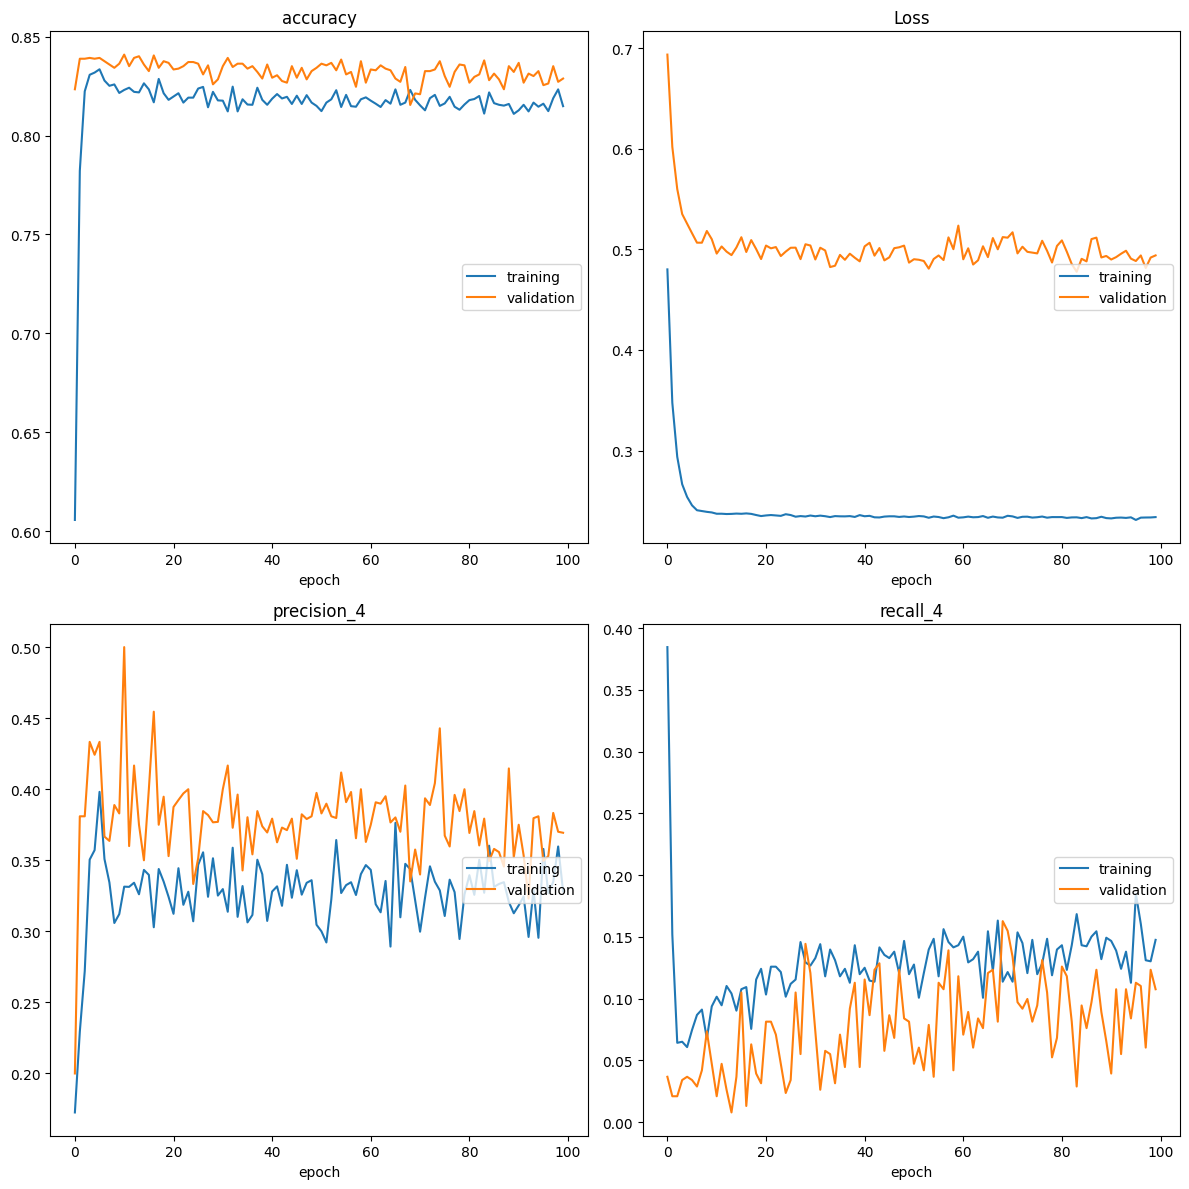

accuracy
	training         	 (min:    0.606, max:    0.833, cur:    0.815)
	validation       	 (min:    0.815, max:    0.841, cur:    0.829)
Loss
	training         	 (min:    0.231, max:    0.480, cur:    0.234)
	validation       	 (min:    0.478, max:    0.694, cur:    0.494)
precision_4
	training         	 (min:    0.173, max:    0.398, cur:    0.328)
	validation       	 (min:    0.200, max:    0.500, cur:    0.369)
recall_4
	training         	 (min:    0.061, max:    0.385, cur:    0.148)
	validation       	 (min:    0.008, max:    0.163, cur:    0.108)
225/225 [==============================] - 1s 5ms/step - loss: 0.2338 - accuracy: 0.8148 - precision_4: 0.3282 - recall_4: 0.1476 - val_loss: 0.4939 - val_accuracy: 0.8288 - val_precision_4: 0.3694 - val_recall_4: 0.1076


In [75]:
model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    callbacks=[PlotLossesKerasTF()],
    class_weight={1: 0.8, 0: 0.3}
)

Loss improved a bit, but still definitely overfit and in need of a bit more work

#### Additional Feature Engineering

Let's remove ```log.annual.inc``` and ```revol.util``` and look at correlations again

In [76]:
non_feature_cols = ['not.fully.paid','fico','log.annual.inc','revol.util']
features = df_dummy.drop(columns=non_feature_cols, axis=1)
num_features = features.drop(columns=binary_cols, axis=1)

<AxesSubplot: >

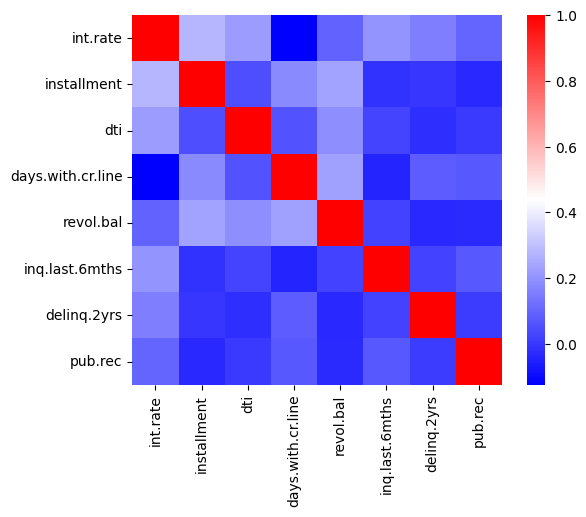

In [77]:
num_corr = num_features.corr()
sns.heatmap(data=num_corr, square=True, cmap='bwr')

In [78]:
corr_arr = num_corr.unstack()
corr_arr = corr_arr[corr_arr != 1]
corr_arr = corr_arr.drop_duplicates()
sorted_corr = corr_arr.sort_values(ascending=False)
opp_sorted_corr = corr_arr.sort_values(ascending=True)
print(f'Top Positive Correlations:\n\n{sorted_corr.head(10)}')
print(f'\n\nTop Negative Correlations:\n\n{opp_sorted_corr.head(10)}')

Top Positive Correlations:

int.rate           installment          0.276140
installment        revol.bal            0.233625
days.with.cr.line  revol.bal            0.229344
int.rate           dti                  0.220006
                   inq.last.6mths       0.202780
dti                revol.bal            0.188748
installment        days.with.cr.line    0.183297
int.rate           delinq.2yrs          0.156079
                   pub.rec              0.098162
                   revol.bal            0.092527
dtype: float64


Top Negative Correlations:

int.rate           days.with.cr.line   -0.124022
days.with.cr.line  inq.last.6mths      -0.041736
revol.bal          delinq.2yrs         -0.033243
installment        pub.rec             -0.032760
revol.bal          pub.rec             -0.031010
dti                delinq.2yrs         -0.021792
installment        inq.last.6mths      -0.010419
                   delinq.2yrs         -0.004368
dti                pub.rec              0.006

In [79]:
# Let's model with the same structure as the last run we did
x_train, x_test, y_train, y_test = data_split_standardise(features,labels)

In [80]:
model = Sequential()
model.add(Input(shape=(None,x_train.shape[1]),name='Input_Layer'))
model.add(Dense(12,activation='relu',name='Hidden_Layer_1',kernel_regularizer=L2(l2=0.01)))
model.add(Dropout(0.30))
model.add(Dense(8,activation='relu',name='Hidden_Layer_2',kernel_regularizer=L2(l2=0.01)))
model.add(Dropout(0.30))
model.add(Dense(1,activation='sigmoid',name='Output_Layer'))

In [81]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy',Precision(),Recall()]
)

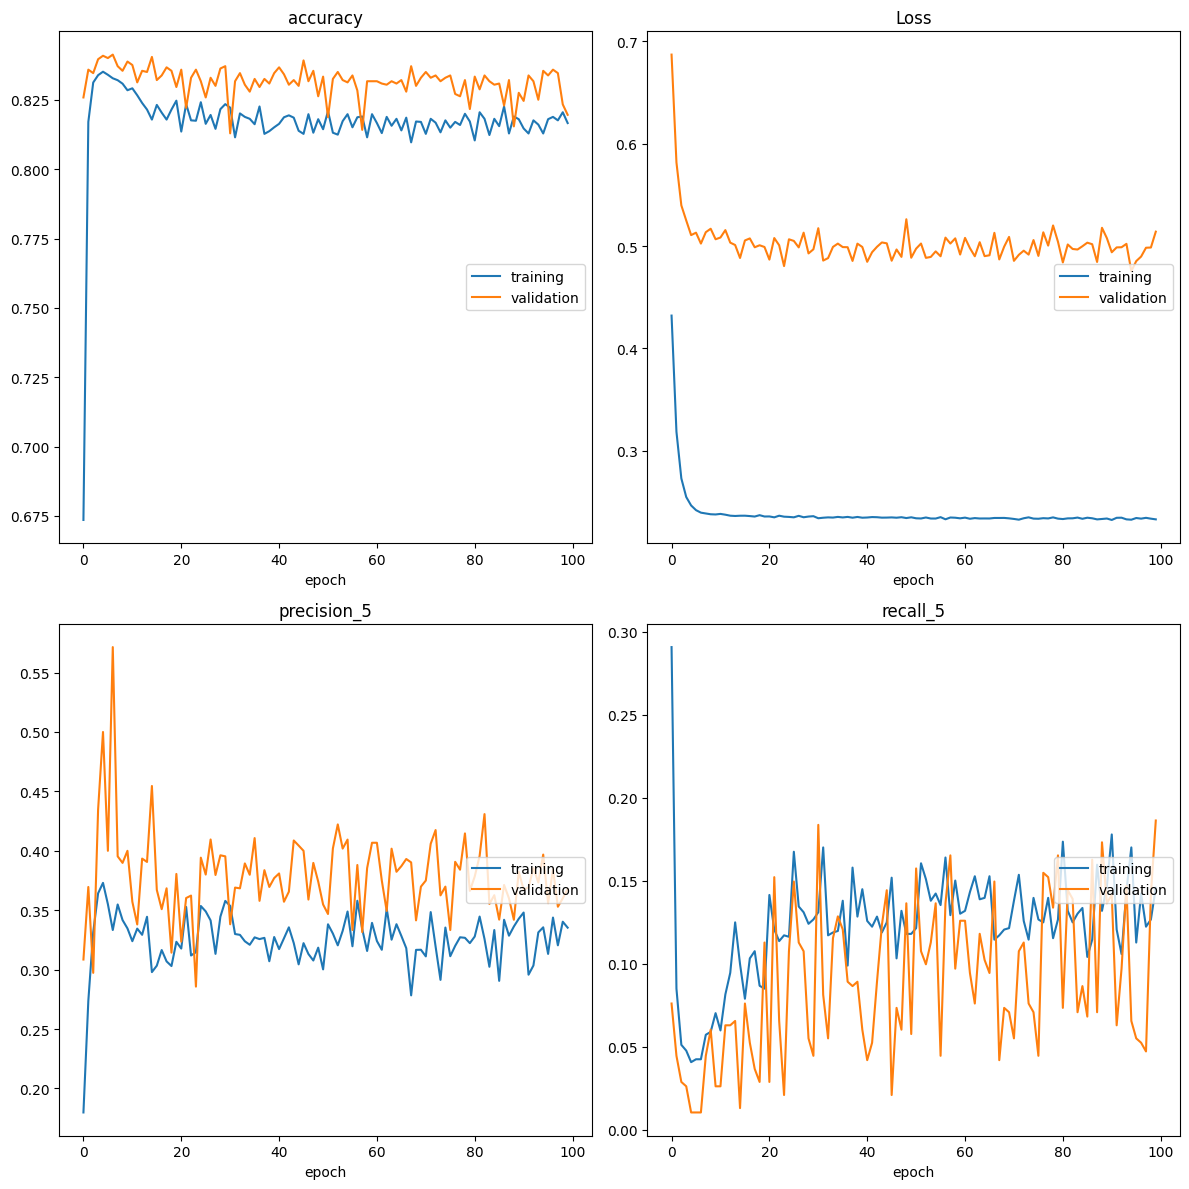

accuracy
	training         	 (min:    0.674, max:    0.835, cur:    0.817)
	validation       	 (min:    0.813, max:    0.841, cur:    0.820)
Loss
	training         	 (min:    0.233, max:    0.432, cur:    0.233)
	validation       	 (min:    0.475, max:    0.687, cur:    0.514)
precision_5
	training         	 (min:    0.180, max:    0.373, cur:    0.335)
	validation       	 (min:    0.286, max:    0.571, cur:    0.368)
recall_5
	training         	 (min:    0.041, max:    0.291, cur:    0.146)
	validation       	 (min:    0.010, max:    0.186, cur:    0.186)
225/225 [==============================] - 1s 5ms/step - loss: 0.2332 - accuracy: 0.8167 - precision_5: 0.3353 - recall_5: 0.1458 - val_loss: 0.5140 - val_accuracy: 0.8196 - val_precision_5: 0.3679 - val_recall_5: 0.1864


In [82]:
model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    callbacks=[PlotLossesKerasTF()],
    class_weight={1: 0.8, 0: 0.3}
)

In [83]:
# Loss was slightly better after removing more features, but still not great
# Going to do grid search to find the optimal class weights & regularization terms
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

In [84]:
# define a function to buuild multiple versions of a model given arrays of different parameters
def build_model(hp):
    # get choice variables
    hp_node = hp.Int('units', min_value=8, max_value=32, step=4)
    hp_reg = hp.Choice('float', [0.001,0.005,0.01,0.05])
    hp_dropout = hp.Choice('float', [0.05,0.10,0.20,0.30,0.40])

    # Build Model
    model = Sequential()
    model.add(Input(shape=(None,x_train.shape[1]),name='Input_Layer'))
    model.add(Dense(hp_node,activation='relu',name='Hidden_Layer_1',kernel_regularizer=L2(l2=hp_reg)))
    model.add(Dropout(hp_dropout))
    model.add(Dense(hp_node,activation='relu',name='Hidden_Layer_2',kernel_regularizer=L2(l2=hp_reg)))
    model.add(Dropout(hp_dropout))
    model.add(Dense(1,activation='sigmoid',name='Output_Layer'))

    model.compile(
        loss=BinaryCrossentropy(from_logits=True),
        optimizer=Adam(hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")),
        metrics=['accuracy',Precision(),Recall()]
    )
    return model

In [85]:
# Early Stopping Parameter
es = EarlyStopping(
    monitor='val_loss',  # parameter to monitor
    patience=5  # consecutive epochs needed to create stopping condition
)

In [86]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    seed=0,
    overwrite=True,
    directory='model_objects',
    project_name='loan_random_search'
)

In [87]:
# run the tuner
tuner.search(
    x_train,
    y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    class_weight={1: 0.8, 0: 0.3},
    callbacks=[es]
)

Trial 10 Complete [00h 00m 34s]
val_loss: 0.5185441772143046

Best val_loss So Far: 0.46403971314430237
Total elapsed time: 00h 05m 15s
INFO:tensorflow:Oracle triggered exit
